<a href="https://colab.research.google.com/github/arnauldmwafise/arnauldmwafise/blob/main/Computational_and_Combinatorial_Enumeration_of_Poset_Matrices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook is based on the article "**Operad Structure of Poset Matrices**"
available at https://arxiv.org/abs/2401.06814 and the algorithms described in **"Computational and Combinatorial Enumeration of Poset Matrices"** available at (https://doi.org/10.31219/osf.io/vg7pr).

In [1]:
# import  packages
import numpy as np
import itertools
import more_itertools
import math
import networkx as nx
import matplotlib.pyplot as plt


**isBinary** function determines if a matrix is binary (0,1).

In [2]:
def isBinary(inputarray):
  return ((inputarray==0) | (inputarray==1)).all()

**isPosetMatrix** function determines if a triangular binary matrix is a poset.

In [11]:
def isPosetMatrix(inputndarray):
    """
    Test if a 2d numpy array represents a poset matrix.
    Args:
        inputndarray (np.array): square matrix.
    Returns:
            True if 2d np.array is poset matrix and False otherwise.
    """

    if isBinary(inputndarray) and (np.allclose(inputndarray, np.tril(inputndarray)) or np.allclose(inputndarray, np.triu(inputndarray))):
        mat=np.matmul(inputndarray,inputndarray)
        initial_positions=list(zip(*np.where(inputndarray == 0)))
        updated_positions=list(zip(*np.where( mat == 0)))
        if  updated_positions==initial_positions:
            return True
        else:
            return False
    else:
        return False

**Examples using isPosetMatrix**

In [21]:
matrix1=np.array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1]])

In [22]:
isPosetMatrix(matrix1)

True

In [23]:
 matrix2= np.array([[1, 0, 0, 0],
    [1, 1, 0, 0],
    [1, 0, 1, 0],[1, 1, 1, 1]])

In [24]:
matrix2

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [25]:
isPosetMatrix(matrix2)

True

In [26]:
matrix3=np.array([[1,0,0],[1,1,0],[0,1,1]])

In [27]:
matrix3

array([[1, 0, 0],
       [1, 1, 0],
       [0, 1, 1]])

In [28]:
isPosetMatrix(matrix3)

False

In [ ]:
def visualize_poset_from_triangular_matrix(poset_matrix,labels=None):

    """
    Visualizes the Hasse diagram of a poset represented by a lower or upper triangular matrix.

    Args:
        matrix (np.array): A square lower triangular NumPy array where matrix[i, j] = 1
                           if element i <= element j in the poset, and 0 otherwise.
                           The matrix represents the partial order relation.
        labels (list, optional): A list of labels for each element in the poset.
                                 If None, default numerical labels will be used.
    """
    num_indices=poset_matrix.shape[0]
    if labels is None:
        labels = list(range(1, (num_indices+1)))
    elif len(labels) !=num_indices:
        raise ValueError("Number of labels must match the number of elements in the matrix.")

    # Identify covering relations
    covering_relations = []
    n = len(labels)
    for i in range(n):
        for j in range(n):
            if poset_matrix[i, j] == 1 and i != j:
                is_covering = True
                for k in range(n):
                    if k != i and k != j and poset_matrix[i, k] == 1 and poset_matrix[k, j] == 1:
                        is_covering = False
                        break
                if is_covering:
                    covering_relations.append((labels[i], labels[j]))

    # Construct the graph
    G = nx.DiGraph()
    G.add_nodes_from(labels)
    G.add_edges_from(covering_relations)

    # Visualize the Hasse Diagram
    pos = nx.spring_layout(G, seed=42)
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
    nx.draw_networkx_edges(G, pos, arrowsize=20)
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    plt.title("Hasse diagram representing the poset matrix :{}".format(poset_matrix))
    plt.axis('off') # Hide axes
    plt.show()

The next three results visualize using the **Hasse diagram the transitively reduced directed acyclic graphs obtained from the poset matrices(matrix1,matrix2,matrix3) defined above.**

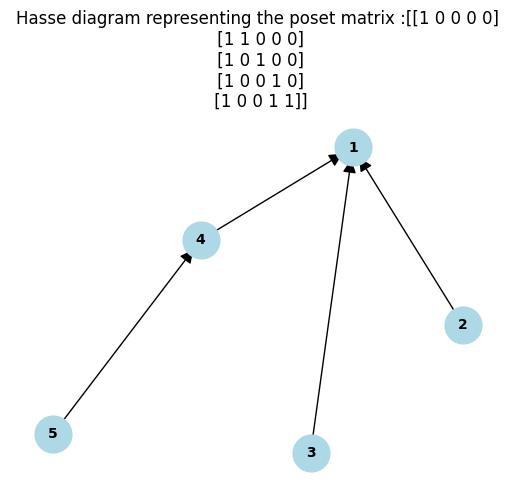

In [ ]:
visualize_poset_from_triangular_matrix(matrix1)

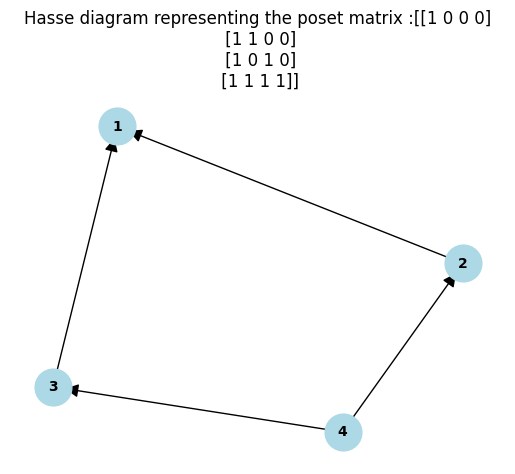

In [ ]:
visualize_poset_from_triangular_matrix(matrix2)

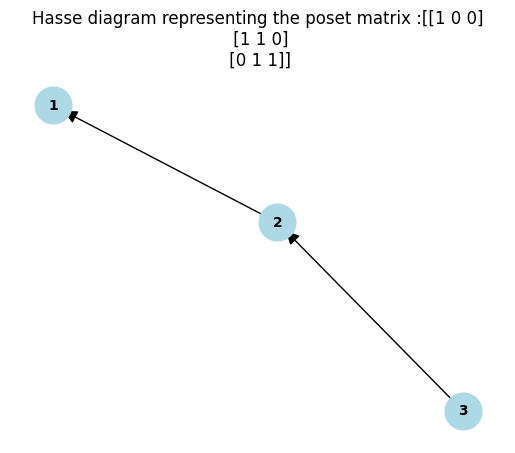

In [ ]:
visualize_poset_from_triangular_matrix(matrix3)

**findMax** function returns the set of all the maximal elements of a poset matrix.

In [12]:
def findMax(posetmatrix):
    """
    Determines all the maximal elemenst of a given poset matrix.
    Args:
        poset matrix: 2d np.array.
    Returns:
            List of all the maximal elements of the poset matrix.
    """

    dimPM=posetmatrix.shape[0]
    maxList=[x for x in range(dimPM) if sum(posetmatrix[:,x])==1]

    return maxList

Example of using **findMax**

In [ ]:
findMax(matrix1)

[1, 2, 4]

**findMin** function returns the set of all the minimal elements of a poset matrix

In [13]:
def findMin(posetmatrix):
    """
    Determines all the minimal elemenst of a given poset matrix.
    Args:
        poset matrix: 2d np.array.
    Returns:
            List of all the minimal elements of the poset matrix.
    """

    dimPM=posetmatrix.shape[0]
    minList=[ind for ind in range(dimPM) if sum(posetmatrix[ind])==1 ]


    return minList

Example of using **findMin**

In [ ]:
findMin(matrix1)

[0]

**createU** constructs the submatrix U in a partial composition operation of poset matrices.

In [14]:
def createU(lposetmatrix,rposetmatrix,i):
    """

    Args:
       lposetmatrix: 2d np.array representing the poset matrices for the first poset matrix (n x n) of
                          the partial composition or operad operation.
       rposetmatrix: d np.array representing the poset matrices for the second poset matrix (m x m) of
                          the partial composition or operad operation.
       i (int): The index in lposetmatrix where rposetmatrix is "inserted" (0-indexed).
    Returns:
            2d np array: (0,1)-matrix of size m × (i − 1).
    """

    rowAi=lposetmatrix[i-1]
    rowAi=rowAi[0:i-1]
    dimE=rposetmatrix.shape[0]
    U=np.zeros( (dimE,i-1),dtype='int64' )

    for z in range(dimE):
      if z in findMax(rposetmatrix):
        U[z]=rowAi


    return U

**Example of using createU**

In [ ]:
createU(matrix1, matrix2,3)

array([[0, 0],
       [0, 0],
       [0, 0],
       [1, 0]])

**createV** function constructs the submatrix V in a partial composition operation of poset matrices.

In [19]:
def createV(lposetmatrix,rposetmatrix,i):
   """
    Args:
       lposetmatrix: 2d np.array representing the poset matrices for the first poset matrix (n x n) of
                          the partial composition or operad operation.
       rposetmatrix: d np.array representing the poset matrices for the second poset matrix (m x m) of
                          the partial composition or operad operation.
       i (int): The index in lposetmatrix where rposetmatrix is "inserted" (0-indexed).
    Returns:
            2d np array: (0,1)-matrix of size (n − i) × m.
   """

   dimF=lposetmatrix.shape[0]
   dimE=rposetmatrix.shape[0]
   colAi=lposetmatrix[i:dimF,i-1]

   v=np.zeros( (dimF-i,dimE),dtype='int64' )
   for k in range(dimE):
      if k in findMin(rposetmatrix):
         v[:,k]=colAi

   return v

Example using **createV**.

In [29]:
createV(matrix1,matrix2,1)

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0]])

In [ ]:
createV(matrix2,matrix1,2)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0]])

**flattenR** function takes in an ndarray as input and returns a copy of the array collapsed into one dimension

In [ ]:
def flattenR(b):
  return b.flatten()

**tupletoArray** converts a tuple into a square array of consisting of all its elements.

In [ ]:
def tupletoArray(q):
  size=len(q)
  calc=int(size/(math.sqrt(size)))
  return np.array(q).reshape(calc,calc)

**totuple** converts an iterable collection of items into a nested collection of tuples

In [ ]:
def totuple(a):
    try:
        return tuple(totuple(i) for i in a)
    except TypeError:
        return a

**getUniqueMatrices** takes a collection of matrices and removes all the duplicate matrices.

In [ ]:
def getUniqueMatrices(matrixlist):

        flatmatlist=list(map(flattenR,matrixlist))
        tuple_list=totuple(flatmatlist)
        uniquetuples=set(tuple_list)
        uniquematlst=list(map(tupletoArray, uniquetuples))

        return uniquematlst


**Example** using getUniqueMatrices function

In [ ]:
lst_duplicates_matrices=[np.array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 np.array([[1, 0, 0],
        [1, 1, 0],
        [1, 0, 1]]),
 np.array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]]),
 np.array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 np.array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]]),
  np.array([[1, 0, 0],
        [1, 1, 0],
        [1, 0, 1]])]

In [ ]:
getUniqueMatrices(lst_duplicates_matrices)

[array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]])]

**mergeList** merge a nested list into a single list.

In [ ]:
def mergeList(nestedlist):

    merged_lst=[]
    for i in range(len(nestedlist)):
        for j in range(len(nestedlist[i])):
            merged_lst +=nestedlist[i][j]

    return merged_lst

**Example** using mergeList function.

In [ ]:
lst_to_merge=[[[np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]]),
   np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]])],
  [np.array([[1, 0, 0],
          [0, 1, 0],
          [1, 1, 1]]),
   np.array([[1, 0, 0],
          [1, 1, 0],
          [1, 0, 1]])]],
 [[np.array([[1, 0, 0],
          [1, 1, 0],
          [0, 0, 1]]),
   np.array([[1, 0, 0],
          [0, 1, 0],
          [0, 1, 1]])],
  [np.array([[1, 0, 0],
          [1, 1, 0],
          [1, 1, 1]]),
   np.array([[1, 0, 0],
          [1, 1, 0],
          [1, 1, 1]])]]]

In [ ]:
mergeList(lst_to_merge)

[array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [0, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [0, 1, 0],
        [1, 1, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 0, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [0, 0, 1]]),
 array([[1, 0, 0],
        [0, 1, 0],
        [0, 1, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]]),
 array([[1, 0, 0],
        [1, 1, 0],
        [1, 1, 1]])]

Set of matrices used for inililiazation of  **counts_list_PM** function.

In [ ]:
rightMat=[np.array([[1, 0],
    [0, 1]]),np.array([[1, 0],
    [1, 1]])]

In [ ]:
leftMat=rightMat

In [ ]:
rightMat

[array([[1, 0],
        [0, 1]]),
 array([[1, 0],
        [1, 1]])]

In [ ]:
leftMat

[array([[1, 0],
        [0, 1]]),
 array([[1, 0],
        [1, 1]])]

In [ ]:
leftMatDisc=[leftMat[0]]

In [ ]:
leftMatDisc

[array([[1, 0],
        [0, 1]])]

In [ ]:
leftMatConn=[leftMat[1]]

In [ ]:
leftMatConn

[array([[1, 0],
        [1, 1]])]

**counts_list_PM** function computes the number of poset matrices or a specified class of poset matrices generated by an operad or partial composition operation.

In [ ]:
def counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=str(),second_operation=str(),third_operation=False, n=1):
    """
    Counts the number of distinct poset matrices including permutation equivalent poset matrices
     generated by partial composition and operad operations for a given size.
     Args:
       listlposetmatrices: list of 2d np.array representing the poset matrices for the first poset matrix (p x p) of
                          the partial composition or operad operation.
                          If default, then list consists of all 2x2 poset matrices represented by list of 2x2 2d arrays
                          in LeftMat
        listrposetmatrices: list of 2d np.array representing the poset matrices for the second poset matrix (q x q) of
                          the partial composition or operad operation.
                          If default, then list consists of all 2x2 poset matrices represented by list of 2x2 2d arrays
                          in rightMat
        first_operation: the defined function name of the partial composition or operad operation.

        second_operation: the defined function name of any operation which determines if a structural property exist for a given poset matrix
                          with an expected binary outcome

        third_operation:If True then the list of np.ndarray poset matrices of sizes (p+q-1 x p+q-1) is presented in the results.
                         If default, then no results with the list of np.ndarray poset matrices of sizes (p+q-1 x p+q-1) in the result set.
         n: the number of iterations to count the poset matrices. Default is 1, if no other positive integer value is provided.
     Returns:
            list consisting of 1. the total number of non-duplicate poset matrices after each iteration,
                               2. list of non-duplicate poset matrices at each iteration if the third operation is True,
                               3. the total number of non-duplicate poset matrices belonging to the class of poset matrices defined
                                  in the second_opeartion,
                               4. the total number of non-duplicate poset matrices not belonging to the class of poset matrices defined
                                  in the second_opeartion.
    """
    counts=[]
    num_PMtypes,num_nonPMtypes=list(),list()
    list_PM=list()

    for step in range(n):

        result=list()
        k=len(listlposetmatrices)

        for item in range(len(listrposetmatrices)):

            rposetmatrix=listrposetmatrices[item]
            computed=list(map(first_operation,listlposetmatrices,[rposetmatrix]*k))
            result.append(computed)

        result=mergeList(result)
        listlposetmatrices=getUniqueMatrices(result)

        if second_operation!=str():

            tupleTypes=tuple(map(second_operation,listlposetmatrices))
            x=tupleTypes.count(True)
            y=tupleTypes.count(False)
            num_PMtypes.append(x)
            num_nonPMtypes.append(y)

        if third_operation==True:

            if second_operation!=str():

               list_PM.append(tuple(zip(listlposetmatrices,tupleTypes)))

            else:

               list_PM.append(listlposetmatrices)

        else:

            list_PM

        counts.append(len(listlposetmatrices))

    return (counts,list_PM,num_PMtypes, num_nonPMtypes)

**generatePM** function generates poset matrices using the  first operad operation

In [ ]:
def generatePM(lposetmatrix,rposetmatrix):

   """
     Args:
        lposetmatrix (np.ndarray): The first poset matrix (p x p).
        rposetmatrix (np.ndarray): The second poset matrix (q x q).
     Returns:
        list of np.ndarray: The resulting poset matrices of size (n+m-1 x n+m-1).
   """

   dimE=rposetmatrix.shape[0]
   dimF=lposetmatrix.shape[0]
   outputlist=[]

   for i in range(1,(dimF+1)): #i (int): The index in lposetmatrix where rposetmatrix is "inserted" (0-indexed).

      A11=lposetmatrix[0:i-1,0:i-1]
      A21=lposetmatrix[i:dimF,i:dimF]
      A22=lposetmatrix[i:dimF,0:i-1]
      y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
      y2= np.zeros((dimE, dimF-i),dtype='int64' )
      rowAi=lposetmatrix[i-1]
      rowAi=rowAi[0:i-1]
      colAi=lposetmatrix[i:dimF,i-1]
      vecones=np.ones((dimE),dtype='int64' )
      Ui=np.tensordot(vecones, rowAi, 0)
      Vi=np.tensordot(vecones, colAi, 0)
      Vi=np.transpose(Vi)
      block1=np.concatenate((A11, y1), axis=1,dtype='int64')
      block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
      block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
      output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
      outputlist.append(output)


   return outputlist

**Example using generatePM**

In [ ]:
generatePM(matrix2,rightMat[1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]])]

**generatePMMin** function generates the poset matrices using the second operad operation

In [ ]:
def generatePMMin(lposetmatrix,rposetmatrix):

   """
     Args:
        lposetmatrix (np.ndarray): The first poset matrix (p x p).
        rposetmatrix (np.ndarray): The second poset matrix (q x q).
    Returns:
        list of np.ndarray: The resulting poset matrices of size (n+m-1 x n+m-1).
   """
   dimE=rposetmatrix.shape[0]
   dimF=lposetmatrix.shape[0]
   outputlist=[]

   for i in range(1,(dimF+1)):#i (int): The index in lposetmatrix where rposetmatrix is "inserted" (0-indexed)

      A11=lposetmatrix[0:i-1,0:i-1]
      A21=lposetmatrix[i:dimF,i:dimF]
      A22=lposetmatrix[i:dimF,0:i-1]
      y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
      y2= np.zeros((dimE, dimF-i),dtype='int64' )
      rowAi=lposetmatrix[i-1]
      rowAi=rowAi[0:i-1]
      vecones=np.ones((dimE),dtype='int64' )
      Ui=np.tensordot(vecones, rowAi, 0)

      v=createV(lposetmatrix,rposetmatrix,i)
      block1=np.concatenate((A11, y1), axis=1,dtype='int64')
      block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
      block3=np.concatenate((A22,v,A21), axis=1,dtype='int64')
      output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
      outputlist.append(output)

   return outputlist

**Example using generatePMMin**

In [ ]:
generatePMMin(matrix2,rightMat[1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 0, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 1, 1, 1, 0],
        [1, 1, 1, 1, 1]])]

**generatePMMax** function generates the poset matrices using the third operad operation

In [ ]:
def generatePMMax(lposetmatrix,rposetmatrix):

   """
     Args:
        lposetmatrix (np.ndarray): The first poset matrix (p x p).
        rposetmatrix (np.ndarray): The second poset matrix (q x q).
    Returns:
        list of np.ndarray: The resulting poset matrices are of size (n+m-1 x n+m-1).
   """

   dimE=rposetmatrix.shape[0]
   dimF=lposetmatrix.shape[0]
   outputlist=[]

   for i in range(1,(dimF+1)):#i (int): The index in lposetmatrix where rposetmatrix is "inserted" (0-indexed)

      A11=lposetmatrix[0:i-1,0:i-1]
      A21=lposetmatrix[i:dimF,i:dimF]
      A22=lposetmatrix[i:dimF,0:i-1]
      y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
      y2= np.zeros((dimE, dimF-i),dtype='int64' )
      U=createU(lposetmatrix,rposetmatrix,i)
      vecones=np.ones((dimE),dtype='int64' )
      colAi=lposetmatrix[i:dimF,i-1]
      Vi=np.tensordot(vecones, colAi, 0)
      Vi=np.transpose(Vi)
      block1=np.concatenate((A11, y1), axis=1,dtype='int64')
      block2=np.concatenate((U,rposetmatrix,y2), axis=1,dtype='int64')
      block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
      output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
      outputlist.append(output)

   return outputlist

**Example using generatePMMax**

In [ ]:
generatePMMax(matrix2,rightMat[1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 1, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]])]

**generatePMMinMax** function generates the poset matrices using the partial composition operation defined in terms of the minimal and maximal elements.

In [ ]:
def generatePMMinMax(lposetmatrix,rposetmatrix):

   """
     Args:
        lposetmatrix (np.ndarray): The first poset matrix (p x p).
        rposetmatrix (np.ndarray): The second poset matrix (q x q).
    Returns:
        list of np.ndarray: The resulting poset matrices of size (n+m-1 x n+m-1).
   """

   dimE=rposetmatrix.shape[0]
   dimF=lposetmatrix.shape[0]
   outputlist=[]


   for i in range(1,(dimF+1)):

      A11=lposetmatrix[0:i-1,0:i-1]
      A21=lposetmatrix[i:dimF,i:dimF]
      A22=lposetmatrix[i:dimF,0:i-1]
      y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
      y2= np.zeros((dimE, dimF-i),dtype='int64' )
      U=createU(lposetmatrix,rposetmatrix,i)
      v=createV(lposetmatrix,rposetmatrix,i)
      block1=np.concatenate((A11, y1), axis=1,dtype='int64')
      block2=np.concatenate((U,rposetmatrix,y2), axis=1,dtype='int64')
      block3=np.concatenate((A22,v,A21), axis=1,dtype='int64')
      output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
      outputlist.append(output)

   return outputlist

**Example using generatePMMinMax**

In [ ]:
generatePMMinMax(matrix2,rightMat[1])

[array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 0, 1, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [1, 1, 1, 0, 0],
        [1, 0, 0, 1, 0],
        [1, 1, 0, 1, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [1, 0, 1, 1, 0],
        [1, 1, 1, 0, 1]]),
 array([[1, 0, 0, 0, 0],
        [1, 1, 0, 0, 0],
        [1, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [1, 1, 1, 1, 1]])]

**Counts both Disconnected and Connected Poset Matrices of size 3x3 to 10x10
generated by generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=str(),third_operation=False,n=8)


([6, 22, 90, 394, 1806, 8558, 41586, 206098], [], [], [])

**Counts and displays both Disconnected and Connected Poset Matrices of size 3x3 to 5x5
generated by generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=str(),third_operation=True,n=3)

([6, 22, 90],
 [[array([[1, 0, 0],
          [0, 1, 0],
          [1, 1, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [1, 0, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [0, 0, 1]]),
   array([[1, 0, 0],
          [0, 1, 0],
          [0, 0, 1]]),
   array([[1, 0, 0],
          [0, 1, 0],
          [0, 1, 1]]),
   array([[1, 0, 0],
          [1, 1, 0],
          [1, 1, 1]])],
  [array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 1, 0],
          [0, 1, 1, 1]]),
   array([[1, 0, 0, 0],
          [1, 1, 0, 0],
          [1, 1, 1, 0],
          [0, 0, 0, 1]]),
   array([[1, 0, 0, 0],
          [1, 1, 0, 0],
          [1, 1, 1, 0],
          [1, 1, 1, 1]]),
   array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 1, 1, 0],
          [0, 1, 1, 1]]),
   array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 1, 0],
          [1, 1, 1, 1]]),
   array([[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 1, 0],
          [0, 0, 0, 1]]),
   arra

**Count the number of  Connected Poset Matrices of size 3x3 to 10x10 generated using generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=str(),third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049], [], [], [])

**Count the number of Connected and Disconnected Poset Matrices of size 3x3 to 10x10 generated using generatePMMin**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=str(),third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098], [], [], [])

**Count the number of  Connected Poset Matrices of size 3x3 to 10x10 generated using generatePMMin**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=str(),third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049], [], [], [])

**Count the number of Connected and Disconnected Poset Matrices of size 3x3 to 10x10 generated using generatePMMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=str(),third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098], [], [], [])

**Number of Connected Poset Matrices of size 3x3 to 10x10 generated by the operad operation generatePMMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=str(),third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049], [], [], [])

**Number of connected and disconnnected poset matrices of size 3x3 to 10x10 generated by operad operation generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=str(),third_operation=False,n=8)


([5, 15, 52, 201, 841, 3726, 17213, 82047], [], [], [])

**Number of Connected Poset Matrices of size 3x3 to 10x10 generated by the operad operation generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=str(),third_operation=False,n=8)


([2, 6, 22, 90, 394, 1806, 8558, 41586], [], [], [])

**Number of Disconnected Poset Matrices of size 3x3 to 10x10 generated by the operad operation generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatDisc,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=str(),third_operation=False,n=8)


([3, 9, 30, 111, 447, 1920, 8655, 40461], [], [], [])

**dualize** function transforms a poset matrix to its dual representation

In [ ]:
def dualize(posetmatrix):

  dimPoset=posetmatrix.shape[0]
  dualmatrix = np.zeros((dimPoset,dimPoset),int)

  for s in range(dimPoset):
     for r in range(dimPoset):
        dualmatrix[s,r]=posetmatrix[dimPoset-r-1,dimPoset-s-1]

  return dualmatrix

**typeOfduality** function determines if a poset matrix is self dualizable by returning False or non-self dualizable by returning True.

In [ ]:
def typeOfduality(posetmatrix):

    if np.allclose(dualize(posetmatrix),posetmatrix):
        return False
    else:
        return True

**Examples using dualize and typeOfduality functions**

In [ ]:
matrix1

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 1, 1]])

In [ ]:
dualize(matrix1)

array([[1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1]])

In [ ]:
matrix2

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
dualize(matrix2)

array([[1, 0, 0, 0],
       [1, 1, 0, 0],
       [1, 0, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
matrix4=np.array([[1,0],[1,1]])

In [ ]:
 typeOfduality(matrix4)

False

In [ ]:
 typeOfduality(matrix1)

True

In [ ]:
unitmat=np.array([[1]])

In [ ]:
dualize(unitmat)

array([[1]])

**Enumeration of Connected and Disconnected poset matrices of size 3x3 and 4x4, generated using generatePM in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=typeOfduality,third_operation=True,n=2)

([6, 22],
 [((array([[1, 0, 0],
           [0, 1, 0],
           [1, 1, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 0, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [0, 0, 1]]),
    True),
   (array([[1, 0, 0],
           [0, 1, 0],
           [0, 0, 1]]),
    False),
   (array([[1, 0, 0],
           [0, 1, 0],
           [0, 1, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 1, 1]]),
    False)),
  ((array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 0, 1, 0],
           [0, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 1, 1, 0],
           [0, 0, 0, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 1, 1]]),
    False),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 1, 1, 0],
           [0, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
          

**Enumeration of Connected and Disconnected poset matrices of size 3x3 to 10x10 generated using generatePM in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=typeOfduality,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [4, 16, 84, 372, 1784, 8468, 41496, 205704],
 [2, 6, 6, 22, 22, 90, 90, 394])

**Enumeration of Connected poset matrices of size 3x3 to 10x10 generated using generatePM in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=typeOfduality,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [2, 8, 42, 186, 892, 4234, 20748, 102852],
 [1, 3, 3, 11, 11, 45, 45, 197])

**Enumeration of Connected and Disconnected poset matrices of size 3x3 to 10x10 generated using generatePMMin in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=typeOfduality,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [4, 15, 84, 372, 1788, 8493, 41533, 205909],
 [2, 7, 6, 22, 18, 65, 53, 189])

**Enumeration of Connected poset matrices of size 3x3 to 10x10 generated using generatePMMin in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=typeOfduality,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [2, 7, 42, 187, 896, 4257, 20778, 103003],
 [1, 4, 3, 10, 7, 22, 15, 46])

**Enumeration of Connected and Disconnected poset matrices of size 3x3 to 10x10 generated using generatePMMax in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=typeOfduality,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 ([4, 15, 84, 372, 1788, 8493, 41533, 205909], [2, 7, 6, 22, 18, 65, 53, 189]))

**Enumeration of Connected poset matrices of size 3x3 to 10x10 generated using generatePMMax in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=typeOfduality,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 ([2, 7, 42, 187, 896, 4257, 20778, 103003], [1, 4, 3, 10, 7, 22, 15, 46]))

**Enumeration of Connected and Disconnected poset matrices of size 3x3 to 10x10 generated using generatePMMinMax in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=typeOfduality,third_operation=False,n=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 ([4, 10, 50, 186, 836, 3674, 17198, 81846], [1, 5, 2, 15, 5, 52, 15, 201]))

**Enumeration of Connected poset matrices of size 3x3 to 10x10 generated using generatePMMinMax in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=typeOfduality,third_operation=False,n=8)

([2, 6, 22, 90, 394, 1806, 8558, 41586],
 [],
 ([2, 4, 22, 84, 394, 1784, 8558, 41496], [0, 2, 0, 6, 0, 22, 0, 90]))

**Enumeration of Disonnected poset matrices of size 3x3 to 10x10 generated using generatePMMinMax in terms of self dual and non-self dual types.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatDisc,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=typeOfduality,third_operation=False,n=8)

([3, 9, 30, 111, 447, 1920, 8655, 40461],
 [],
 ([2, 6, 28, 102, 442, 1890, 8640, 40350], [1, 3, 2, 9, 5, 30, 15, 111]))

**Enumeration of poset matrices here is based on the partial composition operations defined in Theorem 2.1 of the paper "Operad Structure of Poset Matrices(https://arxiv.org/abs/2401.06814 )."**

In [ ]:
def partialComp1(lposetmatrix,rposetmatrix):

   dimE=rposetmatrix.shape[0]
   dimF=lposetmatrix.shape[0]
   outputlist=[]

   for i in range(1,(dimF+1)):

      A11=lposetmatrix[0:i-1,0:i-1]
      A21=lposetmatrix[i:dimF,i:dimF]
      A22=lposetmatrix[i:dimF,0:i-1]
      y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
      y2= np.zeros((dimE, dimF-i),dtype='int64' )
      Ui=np.ones((dimE,i-1),dtype='int64' )
      Vi=np.ones((dimF-i,  dimE),dtype='int64' )
      block1=np.concatenate((A11, y1), axis=1,dtype='int64')
      block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
      block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
      output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
      outputlist.append(output)


   return outputlist

**Enumeration of poset matrices of size 3x3 to 17x17 generated using partialComp1.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=partialComp1,second_operation=str(),third_operation=False,n=15)

([3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584],
 [],
 [],
 [])

In [ ]:
def partialComp2(lposetmatrix,rposetmatrix):

    dimE=rposetmatrix.shape[0]
    dimF=lposetmatrix.shape[0]
    outputlist=[]

    for i in range(1,(dimF+1)):
        A11=lposetmatrix[0:i-1,0:i-1]
        A21=lposetmatrix[i:dimF,i:dimF]
        A22=np.ones((dimF-i,i-1),dtype='int64' )
        y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
        y2= np.zeros((dimE, dimF-i),dtype='int64' )
        Ui=np.zeros((dimE,i-1),dtype='int64' )
        Vi=np.zeros((dimF-i,  dimE),dtype='int64' )
        block1=np.concatenate((A11, y1), axis=1,dtype='int64')
        block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
        block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
        output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
        outputlist.append(output)

    return outputlist

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=partialComp2,second_operation=str(),third_operation=False,n=8)

([3, 6, 16, 40, 112, 314, 900, 2634], [], ([], []))

In [ ]:
def partialComp3(lposetmatrix,rposetmatrix):

    dimE=rposetmatrix.shape[0]
    dimF=lposetmatrix.shape[0]
    outputlist=[]

    for i in range(1,(dimF+1)):

        A11=lposetmatrix[0:i-1,0:i-1]
        A21=lposetmatrix[i:dimF,i:dimF]
        A22=np.ones((dimF-i,i-1),dtype='int64' )
        y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
        y2= np.zeros((dimE, dimF-i),dtype='int64' )
        Ui=np.ones((dimE,i-1),dtype='int64' )
        Vi=np.zeros((dimF-i,  dimE),dtype='int64' )
        block1=np.concatenate((A11, y1), axis=1,dtype='int64')
        block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
        block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
        output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
        outputlist.append(output)

    return outputlist

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=partialComp3,second_operation=str(),third_operation=False,n=8)

([4, 10, 28, 80, 244, 774, 2524, 8414], [], ([], []))

In [ ]:
def partialComp4(lposetmatrix,rposetmatrix):

    dimE=rposetmatrix.shape[0]
    dimF=lposetmatrix.shape[0]
    outputlist=[]


    for i in range(1,(dimF+1)):

        A11=lposetmatrix[0:i-1,0:i-1]
        A21=lposetmatrix[i:dimF,i:dimF]
        A22=np.ones((dimF-i,i-1),dtype='int64' )
        y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
        y2= np.zeros((dimE, dimF-i),dtype='int64' )
        Ui=np.zeros((dimE,i-1),dtype='int64' )
        Vi=np.ones((dimF-i,  dimE),dtype='int64' )
        block1=np.concatenate((A11, y1), axis=1,dtype='int64')
        block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
        block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
        output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
        outputlist.append(output)

    return outputlist

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=partialComp4,second_operation=str(),third_operation=False,n=8)

([4, 10, 28, 80, 244, 774, 2524, 8414], [], ([], []))

In [ ]:
def partialComp5(lposetmatrix,rposetmatrix):

    dimE=rposetmatrix.shape[0]
    dimF=lposetmatrix.shape[0]
    outputlist=[]

    for i in range(1,(dimF+1)):

        A11=lposetmatrix[0:i-1,0:i-1]
        A21=lposetmatrix[i:dimF,i:dimF]
        A22=np.zeros((dimF-i,i-1),dtype='int64' )
        y1=np.zeros( (i-1, dimF+dimE-i),dtype='int64' )
        y2= np.zeros((dimE, dimF-i),dtype='int64' )
        Ui=np.zeros((dimE,i-1),dtype='int64' )
        Vi=np.zeros((dimF-i,  dimE),dtype='int64' )

        block1=np.concatenate((A11, y1), axis=1,dtype='int64')
        block2=np.concatenate((Ui,rposetmatrix,y2), axis=1,dtype='int64')
        block3=np.concatenate((A22,Vi,A21), axis=1,dtype='int64')
        output=np.concatenate((block1,block2,block3), axis=0,dtype='int64')
        outputlist.append(output)

    return outputlist

**Enumeration of poset matrices of size 3x3 to 16x16 generated using partialComp1.**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=partialComp5,second_operation=str(),third_operation=False,n=14)

([3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597], [], ([], []))

**isConnected** function determines if a poset matrix is connected or disconnected.

In [ ]:
def isUnitMatrix(posetmatrix):

    if np.all(posetmatrix== 1) and posetmatrix.shape[0]==1:
        return True
    else:
        return False

In [ ]:
def isConnected(posetmatrix):

    if posetmatrix.shape[0]==0:
        return False

    if posetmatrix.shape[0]==1:
        return isUnitMatrix(posetmatrix)

    else:

        graph = nx.from_numpy_array(posetmatrix)
        is_connected = nx.is_connected(graph)
        return is_connected

In [ ]:
pmatrix12=np.array([[1,0,0,0],[0,1,0,0],[0,1,1,0],[1,1,1,1]])

In [ ]:
pmatrix12

array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [1, 1, 1, 1]])

In [ ]:
isConnected(pmatrix12)

True

In [ ]:
pmatrix14=np.array([[1,0,0],[1,1,0],[0,0,1]])

In [ ]:
pmatrix14

array([[1, 0, 0],
       [1, 1, 0],
       [0, 0, 1]])

In [ ]:
isConnected(pmatrix14)

False

In [ ]:
pmatrix15=np.array([[1,0,0],[0,1,0],[0,0,1]])

In [ ]:
pmatrix15

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

In [ ]:
isConnected(pmatrix15)

False

**isSemiRight** function determines if a poset matrix is semi-right dualizable.

In [ ]:
def isSemiRight(posetmatrix):

    dimposetmatrix=posetmatrix.shape[0]
    i,depth1=0,0
    while i<dimposetmatrix:
        if  all(posetmatrix[i:,i]):
            depth1=depth1+1
            i=i+1
        else:
            break
    if (depth1>0 and not isConnected(posetmatrix[depth1:,depth1:]) and not np.allclose(dualize(posetmatrix[depth1:,depth1:]),posetmatrix[depth1:,depth1:])):
        return True
    else:
        return False

**isSemiLeft** function determines if a poset matrix is semi-left dualizable.

In [ ]:
def isSemiLeft(posetmatrix):

    dimposetmatrix=posetmatrix.shape[0]
    i,depth2=0,0

    while i<dimposetmatrix:
        if  all(posetmatrix[dimposetmatrix-i-1,:dimposetmatrix-i]):
            depth2=depth2+1
            i=i+1
        else:
            break
    else:
        depth2
    if (depth2>0 and not isConnected(posetmatrix[:-depth2,:-depth2]) and not np.allclose(dualize(posetmatrix[:-depth2,:-depth2]),posetmatrix[:-depth2,:-depth2])):
        return  True
    else:
        return False

**isSemiEquidual** function determines if a poset matrix is semi-equidual

In [ ]:
def isSemiEquidual(posetmatrix):
    if isSemiLeft(posetmatrix) or isSemiRight(posetmatrix):
        return True
    else:
        return False

**Enumeration of poset matrices for the operations isSemiRight and generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isSemiRight,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 52, 238, 1130, 5364, 26112],
 [6, 20, 80, 342, 1568, 7428, 36222, 179986])

**Enumeration of poset matrices corresponding to the operations isSemiRight and generatePMMin**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=isSemiRight,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 ([0, 2, 10, 53, 249, 1223, 5984, 29863],
  [6, 20, 80, 341, 1557, 7335, 35602, 176235]))

**Enumeration of poset matrices corresponding to operations isSemiRight and generatePMMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=isSemiRight,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 ([0, 0, 0, 0, 0, 0, 0, 0], [6, 22, 90, 394, 1806, 8558, 41586, 206098]))

**Enumeration of poset matrices corresponding to operations isSemiRight and generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=isSemiRight,third_operation=False,n=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [5, 15, 52, 201, 841, 3726, 17213, 82047])

**Enumeration of poset matrices for the operations isSemiLeft and generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isSemiLeft,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 ([0, 2, 10, 52, 239, 1144, 5487, 27011],
  [6, 20, 80, 342, 1567, 7414, 36099, 179087]))

**Enumeration of poset matrices for the operations isSemiLeft and generatePMMin**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=isSemiLeft,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 ([0, 0, 0, 0, 0, 0, 0, 0], [6, 22, 90, 394, 1806, 8558, 41586, 206098]))

**Enumeration of poset matrices for the operations isSemiLeft and generatePMMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=isSemiLeft,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 ([0, 2, 10, 53, 251, 1255, 6295, 32277],
  [6, 20, 80, 341, 1555, 7303, 35291, 173821]))

**Enumeration of poset matrices for the operations isSemiLeft and generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=isSemiLeft,third_operation=False,n=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 ([0, 0, 0, 0, 0, 0, 0, 0], [5, 15, 52, 201, 841, 3726, 17213, 82047]))

**Enumeration of poset matrices for the operations isSemiEquiDual and generatePM**

In [ ]:
a1=np.array([0, 2, 10, 53, 250, 1224, 5982, 29853])

In [ ]:
a2=np.array([0, 2, 10, 52, 239, 1144, 5487, 27011])

In [ ]:
np.add(a1,a2)

array([    0,     4,    20,   105,   489,  2368, 11469, 56864])

**Enumeration of poset matrices for the operations isSemiEquiDual and generatePMMin**

In [ ]:
b1=np.array([0, 2, 10, 53, 249, 1223, 5984, 29863])

In [ ]:
b2=np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.add(b1,b2)

array([    0,     2,    10,    53,   249,  1223,  5984, 29863])

**Enumeration of poset matrices for the operations isSemiEquiDual and generatePMMax**

In [ ]:
c1=np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
c2=np.array([0, 2, 10, 53, 251, 1255, 6295, 32277])

In [ ]:
np.add(c1,c2)

array([    0,     2,    10,    53,   251,  1255,  6295, 32277])

**Enumeration of poset matrices for the operations isSemiEquiDual and generatePMMinMax**

In [ ]:
d1=np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
d2=np.array([0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
np.add(d1,d2)

array([0, 0, 0, 0, 0, 0, 0, 0])

**isOrdinalSum** determines if a poset matrix is decomposable by the ordinal sum series-parallel poset matrix operation

In [ ]:
def isOrdinalSum(posetmatrix):

    if np.all(posetmatrix== 1) and len(posetmatrix)==1:
        return True

    level,column=0,0
    dimPosetMatrix=posetmatrix.shape[0]

    while posetmatrix[-1,column]==1 and posetmatrix[-2,column]==1 and dimPosetMatrix>2:
        column=column+1
        if column>0:
            needarray=np.ones(( column,), dtype=int)
        else:
            column
            break

    while  posetmatrix[-1,column]==1 and (posetmatrix[-2,0]!=1 or dimPosetMatrix==2):

        column=column+1
        if column==dimPosetMatrix:
            break

    if 'needarray' in vars():

        if len(needarray)!=0:
            level=level+2
        else:
            level

        for s in range(dimPosetMatrix-3,-1,-1):
            if len(needarray)>0 and np.array_equal( needarray,posetmatrix[s,0:column]):
                level=level+1
            else:
                level
                break
        if level==dimPosetMatrix:
            level=level-1


    if column>1 and level>1:
            column=column-1


    return column+level==dimPosetMatrix

**Examples using isOrdinalSum** to determine if a poset matrix is decomposable by the ordinal sum series-parallel poset matrix operation

In [ ]:
matrix88=np.array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 0, 0, 1]])

In [ ]:
isOrdinalSum(matrix88)

False

In [ ]:
matrix99=np.array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [0, 0, 1, 0],
           [1, 0, 1, 1]])

In [ ]:
isOrdinalSum(matrix99)

False

In [ ]:
matrix77=np.array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 0, 1, 0],
           [1, 0, 1, 1]])

In [ ]:
isOrdinalSum(matrix77)

True

**createSubMatrix** takes a set of indices of a matrix and returns the submatrix associated with that set of indices.

In [ ]:
def createSubMatrix(matrix,set):

    lst=list(set)
    subarr=[[matrix[i,j] for j in lst]for i in lst]
    return np.array(subarr)


In [ ]:
def are_all_true(data):
    return all(data)

**isDirectSum** determines if a poset matrix is decomposable by the direct sum series-parallel poset matrix operation

In [ ]:
def isDirectSum(matrix):

  if not isConnected(matrix):
        graph_matrix = nx.from_numpy_array(matrix)
        connected_components = list(nx.connected_components(graph_matrix))
        matrixlist=list(map(createSubMatrix,[matrix]*(len(connected_components)),connected_components))
        list_if_ords=list(map(isOrdinalSum,matrixlist))

        return are_all_true(list_if_ords)
  else:
      return False

**Enumeration of poset matrices of size 3x3 and 4x4 using the operations isOrdinalSum and generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isOrdinalSum,third_operation=True,n=2)

([3, 11],
 [((array([[1, 0, 0],
           [0, 1, 0],
           [1, 1, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 0, 1]]),
    True),
   (array([[1, 0, 0],
           [1, 1, 0],
           [1, 1, 1]]),
    True)),
  ((array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 0, 1, 0],
           [1, 0, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [0, 0, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 0, 1]]),
    False),
   (array([[1, 0, 0, 0],
           [0, 1, 0, 0],
           [0, 1, 1, 0],
           [1, 1, 1, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 1, 1, 0],
           [1, 1, 0, 1]]),
    True),
   (array([[1, 0, 0, 0],
           [1, 1, 0, 0],
           [1, 1, 1, 0]

**Enumeration of poset matrices of size 3x3 to 10x10 for the operations isOrdinalSum and generatePMMin**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=isOrdinalSum,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [3, 8, 25, 91, 367, 1591, 7263, 34415],
 [0, 3, 20, 106, 536, 2688, 13530, 68634])

**Enumeration of poset matrices of size 3x3 to 10x10 using the operations isOrdinalSum and generatePMMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=isOrdinalSum,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 ([3, 8, 23, 81, 329, 1451, 6723, 32189],
  [0, 3, 22, 116, 574, 2828, 14070, 70860]))

**Enumeration of poset matrices of size 3x3 to 10x10 using the operations isOrdinalSum and generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=isOrdinalSum,third_operation=False,n=8)

([2, 6, 22, 90, 394, 1806, 8558, 41586],
 [],
 ([2, 2, 2, 2, 2, 2, 2, 2], [0, 4, 20, 88, 392, 1804, 8556, 41584]))

**Enumeration of poset matrices of size 3x3 and 4x4 using the operations isDirectSum and generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isDirectSum,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [3, 11, 43, 176, 755, 3374, 12401, 63397],
 [3, 11, 47, 218, 1051, 5184, 29185, 142701])

**isDoubleDual** function determines if a poset matrix is double dualizable.

In [ ]:
def isDoubleDual(posetmatrix):

    last_row=posetmatrix[-1]
    first_col=posetmatrix[:,0]

    if np.allclose(last_row,first_col[::-1]) and len(findMax(posetmatrix))==len(findMin(posetmatrix)):
        x=posetmatrix[:-1,:-1]
        y=posetmatrix[1:,1:]

        if isSemiRight(x) and isSemiLeft(y) and np.allclose(x[1:,1:],y[:-1,:-1]):
            return True
        else:
            return False
    else:
        return False

**Enumeration of poset matrices of size 3x3 to 10x10 using the operations isDoubleDual and generatePM**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isDoubleDual,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [0, 0, 2, 8, 42, 195, 966, 4744],
 [3, 11, 43, 189, 861, 4084, 19827, 98305])

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isDoubleDual,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 [0, 0, 2, 8, 42, 186, 892, 4234],
 [3, 11, 43, 189, 861, 4093, 19901, 98815])

**Enumeration of poset matrices of size 3x3 to 10x10 using the operations isDoubleDual and generatePMMin**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=isDoubleDual,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 ([0, 0, 0, 0, 0, 0, 0, 0], [3, 11, 45, 197, 903, 4279, 20793, 103049]))

**Enumeration of poset matrices of size 3x3 to 10x10 using the operations isDoubleDual and generatePMMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=isDoubleDual,third_operation=False,n=8)

([3, 11, 45, 197, 903, 4279, 20793, 103049],
 [],
 ([0, 0, 0, 0, 0, 0, 0, 0], [3, 11, 45, 197, 903, 4279, 20793, 103049]))

**Enumeration of poset matrices of size 3x3 to 10x10 using the operations isDoubleDual and generatePMMinMax**

In [ ]:
counts_list_PM(listlposetmatrices=leftMatConn,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=isDoubleDual,third_operation=False,n=8)

([2, 6, 22, 90, 394, 1806, 8558, 41586],
 [],
 ([0, 0, 0, 0, 0, 0, 0, 0], [2, 6, 22, 90, 394, 1806, 8558, 41586]))

In [ ]:
def isSemiEquidualizable(posetmatrix):
    if isSemiLeft(posetmatrix) or isSemiRight(posetmatrix) or isDoubleDual(posetmatrix):
        return True
    else:
        return False

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePM,second_operation=isSemiEquidualizable,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 4, 22, 113, 523, 2502, 12034, 59305],
 [6, 18, 68, 281, 1283, 6056, 29552, 146793])

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMin,second_operation=isSemiEquidualizable,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 53, 249, 1223, 5984, 29863],
 [6, 20, 80, 341, 1557, 7335, 35602, 176235])

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMax,second_operation=isSemiEquidualizable,third_operation=False,n=8)

([6, 22, 90, 394, 1806, 8558, 41586, 206098],
 [],
 [0, 2, 10, 53, 251, 1255, 6295, 32277],
 [6, 20, 80, 341, 1555, 7303, 35291, 173821])

In [ ]:
counts_list_PM(listlposetmatrices=leftMat,listrposetmatrices=rightMat,first_operation=generatePMMinMax,second_operation=isSemiEquidualizable,third_operation=False,n=8)

([5, 15, 52, 201, 841, 3726, 17213, 82047],
 [],
 [0, 0, 0, 0, 0, 0, 0, 0],
 [5, 15, 52, 201, 841, 3726, 17213, 82047])